https://en.wikipedia.org/wiki/Spectral_density

<img src="https://plus.maths.org/content/sites/plus.maths.org/files/articles/2017/carola/Fourier_transform.gif">

In [2]:
import numpy
print('numpy',numpy.__version__)
import random
import pandas
print('pandas',pandas.__version__)
import matplotlib.pyplot as plt
import scipy
from scipy import signal

numpy 1.13.3
pandas 0.23.4


# my attempt

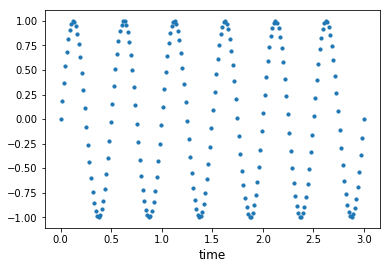

In [3]:
number_of_cycles_per_unit_time = 2
number_of_measurements = number_of_cycles_per_unit_time*100

#t = numpy.linspace(0,number_of_cycles,number_of_measurements)
max_time=3
t = numpy.linspace(0,max_time,number_of_measurements)

y=numpy.sin(t*2*numpy.pi*number_of_cycles_per_unit_time)
_=plt.scatter(t,y,s=10)
_=plt.xlabel('time',fontsize=12)
#plt.gcf().set_size_inches(15,8);

When `x` is real-valued, the values of `y[n]` for positive frequencies is the conjugate of the values `y[n]` for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted. (<a href="https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html">source</a>)


You get an output of length `N` if your input has length `N`. After removal of symmetric part, what you get are `N/2` points that span frequencies `0` (DC component) to Nyquist frequency (`f_s/2`). (<a href="https://dsp.stackexchange.com/questions/40766/calculating-values-of-frequency-bins-in-python">source</a>)

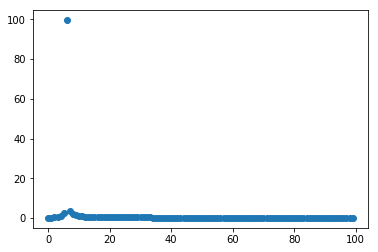

In [4]:
#print(len(fft(y)))
fft_of_y = scipy.fftpack.fft(y)

plt.scatter(x=range(len(fft_of_y[0:len(fft_of_y)//2])),y=abs(fft_of_y[0:len(fft_of_y)//2]));
#plt.scatter(x=range(len(fft_of_y)),y=fft_of_y);

# https://gist.github.com/jedludlow/3919130

$f_s$ is the sampling frequency, while $f$ is a base frequency for the signal content. We create a signal that contains components at a couple of multiples of this base frequency. Note the amplitudes here since we will be trying to extract those correctly from the FFT later.

In [25]:
f_s = 50.0 # Hz
f = 1.0 # Hz
time = numpy.arange(0.0, 3.0, 1/f_s)
x = 5 * numpy.sin(2 * numpy.pi * f * time) + 2 * numpy.sin(10 * 2 * numpy.pi * f * time)

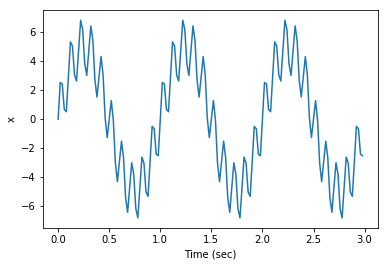

In [26]:
plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x");

In [27]:
fft_x = numpy.fft.fft(x)
n = len(fft_x)
freq = numpy.fft.fftfreq(n, 1/f_s)

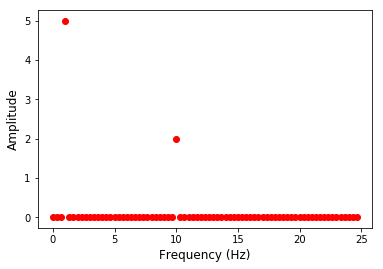

In [29]:
fft_x_half = (2.0 / n) * fft_x[:n//2]
plt.scatter(freq[:n//2], numpy.abs(fft_x_half),color='r')
plt.xlabel("Frequency (Hz)",fontsize=12)
plt.ylabel("Amplitude",fontsize=12);

# Example from Scipy FFTpack

https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

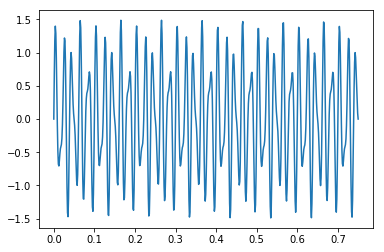

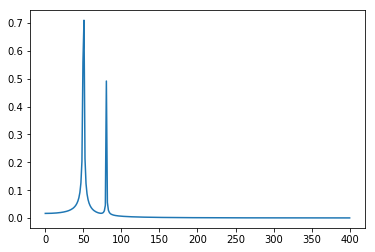

In [31]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0

x = numpy.linspace(0.0, N*T, N)
y = numpy.sin(50.0 * 2.0*numpy.pi*x) + 0.5*numpy.sin(80.0 * 2.0*numpy.pi*x)
plt.plot(x,y)
plt.show()

yf = scipy.fftpack.fft(y)
xf = numpy.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * numpy.abs(yf[0:N//2]))
plt.show()

# from Plotly

https://plot.ly/matplotlib/fft/

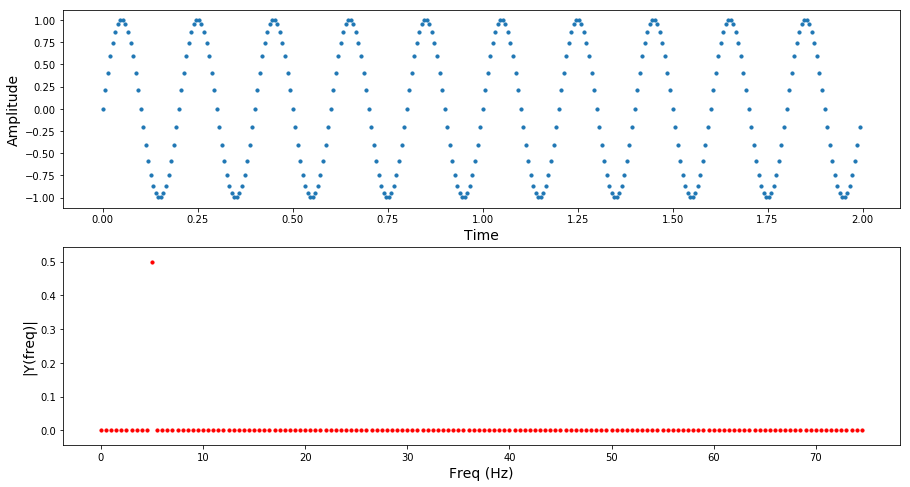

In [5]:
measurements_per_second = 150.0;  # sampling rate (samples per second)
measurement_period_in_seconds = 1.0/measurements_per_second; # sampling interval (aka period, in units of seconds)
max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t)

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
ax[0].scatter(t,y,s=10)
ax[0].set_xlabel('Time',fontsize=14)
ax[0].set_ylabel('Amplitude',fontsize=14)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=14)
ax[1].set_ylabel('|Y(freq)|',fontsize=14);
plt.gcf().set_size_inches(15,8)

## two waves

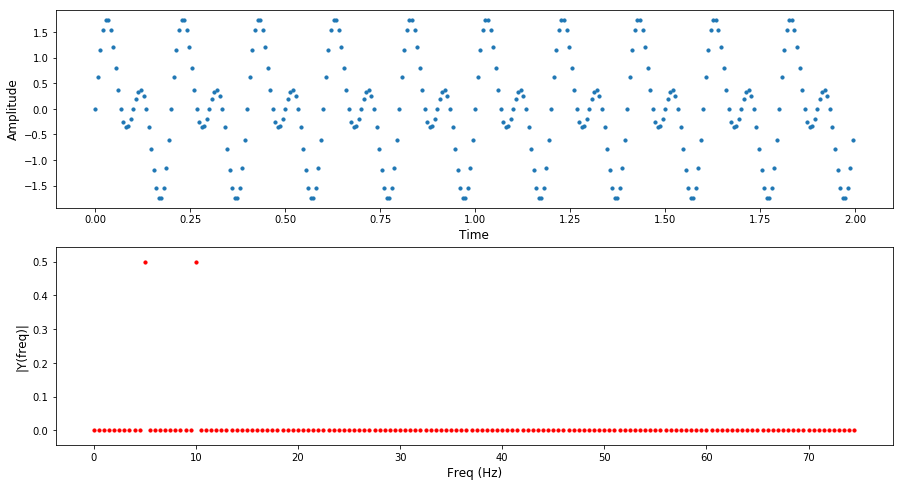

In [6]:
max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t) + numpy.sin(2*2*numpy.pi*freq_of_signal_in_Hz*t)

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
ax[0].scatter(t,y,s=10)
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Amplitude',fontsize=12)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=12)
ax[1].set_ylabel('|Y(freq)|',fontsize=12);
plt.gcf().set_size_inches(15,8)

In [ ]:
## with noise

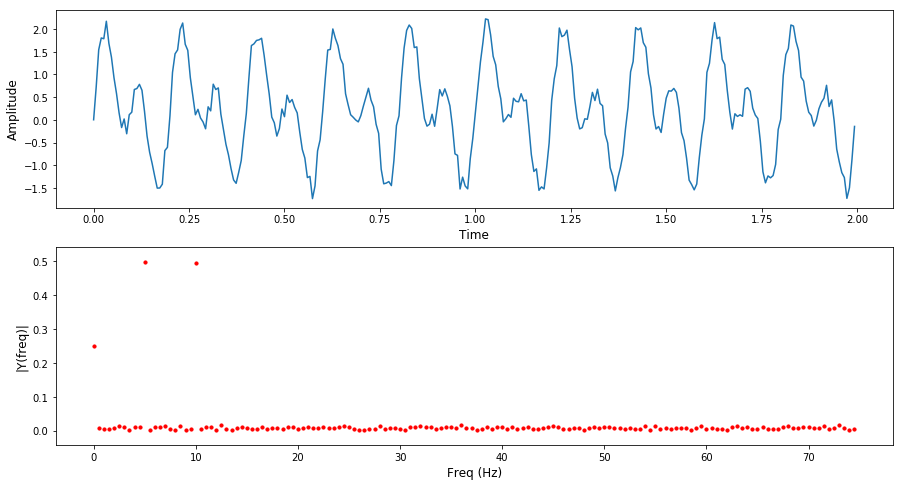

In [27]:
max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

noise = 0.0005*numpy.asarray(random.sample(range(0,1000),len(t)))

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t) + numpy.sin(2*2*numpy.pi*freq_of_signal_in_Hz*t)+noise

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
#ax[0].scatter(t,y,s=10)
ax[0].plot(t,y)
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Amplitude',fontsize=12)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=12)
ax[1].set_ylabel('|Y(freq)|',fontsize=12);
plt.gcf().set_size_inches(15,8)

# even more noise

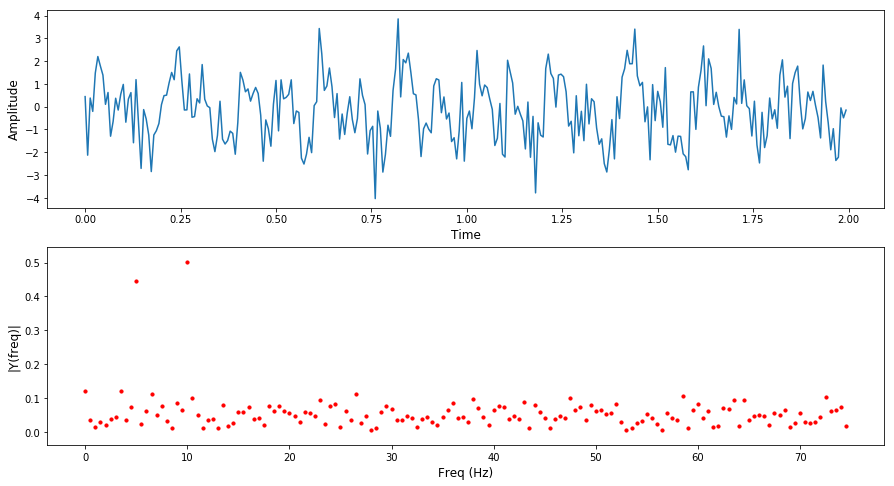

In [28]:


max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

noise = numpy.random.randn(len(t))

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t) + numpy.sin(2*2*numpy.pi*freq_of_signal_in_Hz*t)+noise

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
#ax[0].scatter(t,y,s=10)
ax[0].plot(t,y)
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Amplitude',fontsize=12)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=12)
ax[1].set_ylabel('|Y(freq)|',fontsize=12);
plt.gcf().set_size_inches(15,8)

# Periodogram

https://en.wikipedia.org/wiki/Periodogram

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.periodogram.html

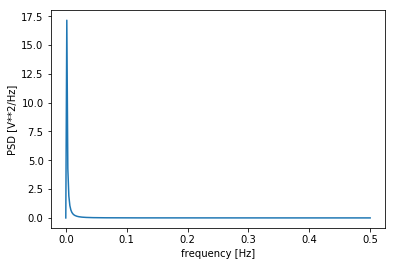

In [7]:
f, Pxx_den = signal.periodogram(x)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

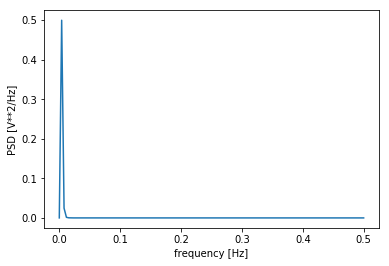

In [8]:
f, Pxx_den = signal.welch(x)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

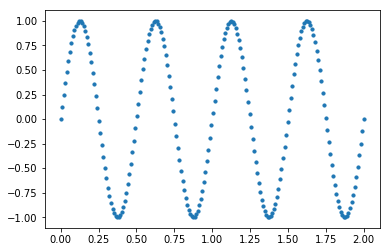

In [9]:
number_of_cycles = 2
number_of_measurements = number_of_cycles*100

t = numpy.linspace(0,number_of_cycles,number_of_measurements)

y=numpy.sin(2*t*2*numpy.pi)
_=plt.scatter(t,y,s=10)
#plt.gcf().set_size_inches(15,8);

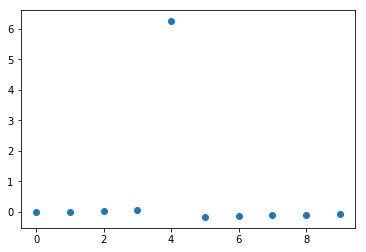

In [10]:
#print(len(fft(y)))
fft_of_y = scipy.fftpack.fft(y)

plt.scatter(x=range(len(fft_of_y[0:10])),y=fft_of_y[0:10]);
#plt.ylim([-5,25])

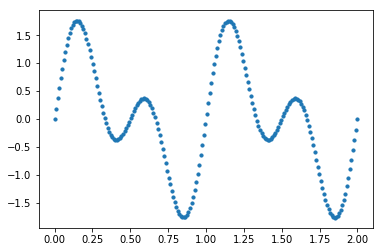

In [11]:
number_of_cycles = 2
number_of_measurements = number_of_cycles*100

t = numpy.linspace(0,number_of_cycles,number_of_measurements)

y=numpy.sin(2*t*2*numpy.pi)+numpy.sin(t*2*numpy.pi)
_=plt.scatter(t,y,s=10)

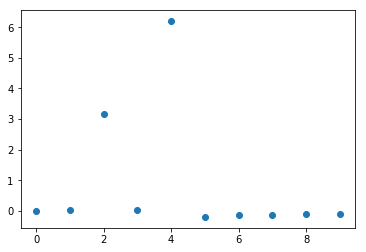

In [12]:
#print(len(fft(y)))
fft_of_y = scipy.fftpack.fft(y)

plt.scatter(x=range(len(fft_of_y[0:10])),y=fft_of_y[0:10]);

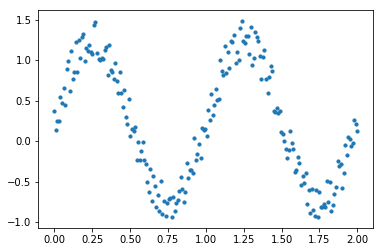

In [13]:
noise = 0.0005*numpy.asarray(random.sample(range(0,1000),number_of_measurements))
#print('max:',max(noise))
#print(noise[0:10])

y=numpy.sin(t*2*numpy.pi)+noise
_=plt.scatter(t,y,s=10)

In [14]:
fft_of_y = fft(y)

plt.scatter(x=range(len(fft_of_y[0:10])),y=fft_of_y[0:10]);

NameError: name 'fft' is not defined